In [315]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [316]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [317]:
signal_frequency = 50  # in Hz

In [318]:
music = wavfile.read('data/Portal_Radio_input.wav')

In [319]:
music

(44100, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

In [320]:
music[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [321]:
fs = music[0]
sound_data = music[1]

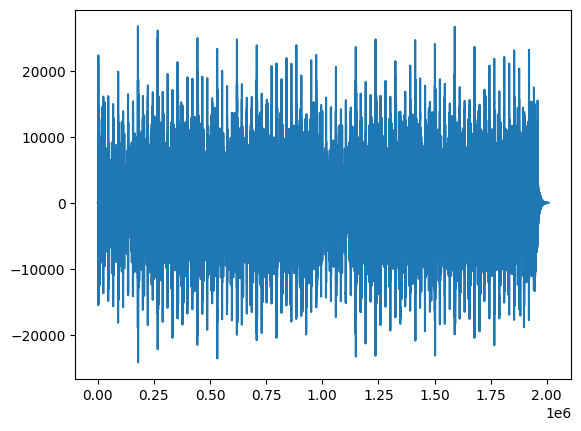

In [322]:
plt.plot(sound_data)

In [323]:
base_length = (sound_data.shape[0] // fs)  # in seconds

base_length

45

In [324]:
sound_data = sound_data[:fs * base_length]

In [325]:
# scale the data
sound_data = sound_data / np.max(np.abs(sound_data))


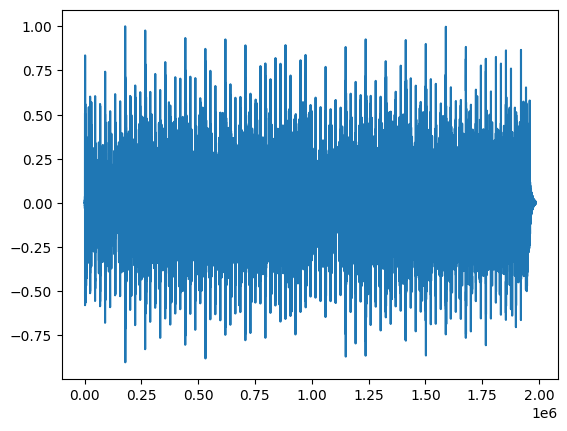

In [326]:
plt.plot(sound_data)

In [327]:
bit_duration = 0.4  # in seconds
bit_sample_duration = int(fs * bit_duration)
bit_sample_duration

17640

In [328]:
code_encode = "votre code : 3099. regardez le LSB de chaque pixel de l'image"
# convert code to binary string forcing it to be 8 bits long
caracters_values = [ord(c) for c in code_encode]
code_string = ''.join([format(c, '08b') for c in caracters_values])
print(code_string)
code_string = code_string + format(4, '08b')
code_string, len(code_string)

01110110011011110111010001110010011001010010000001100011011011110110010001100101001000000011101000100000001100110011000000111001001110010010111000100000011100100110010101100111011000010111001001100100011001010111101000100000011011000110010100100000010011000101001101000010001000000110010001100101001000000110001101101000011000010111000101110101011001010010000001110000011010010111100001100101011011000010000001100100011001010010000001101100001001110110100101101101011000010110011101100101


('0111011001101111011101000111001001100101001000000110001101101111011001000110010100100000001110100010000000110011001100000011100100111001001011100010000001110010011001010110011101100001011100100110010001100101011110100010000001101100011001010010000001001100010100110100001000100000011001000110010100100000011000110110100001100001011100010111010101100101001000000111000001101001011110000110010101101100001000000110010001100101001000000110110000100111011010010110110101100001011001110110010100000100',
 496)

In [329]:
needed_length = bit_sample_duration * len(code_string)
if needed_length > sound_data.shape[0]:
    sound_data = np.concatenate(tuple(sound_data for _ in range(needed_length // sound_data.shape[0] + 1)))
sound_data.shape

(9922500,)

In [330]:
print("signal_data shape: ", sound_data.shape)
print("space that will be used by data: ", needed_length)
assert bit_sample_duration * len(code_string) < sound_data.shape[0]

signal_data shape:  (9922500,)
space that will be used by data:  8749440


In [331]:
signal_data = np.zeros(sound_data.shape)

In [332]:
signal_data[2 * bit_sample_duration:(2 + 1) * bit_sample_duration].shape

(17640,)

In [333]:
np.sin(
            2 * np.pi * signal_frequency * np.linspace(
                2 * bit_sample_duration,
                (2 + 1) * bit_sample_duration,
                bit_sample_duration
            )
        ).shape

(17640,)

In [334]:
for i in range(len(code_string)):
    if code_string[i] == '1':
        signal_data[i * bit_sample_duration:(i + 1) * bit_sample_duration] = np.sin(
            2 * np.pi * signal_frequency * np.linspace(
                i * bit_sample_duration,
                (i + 1) * bit_sample_duration,
                bit_sample_duration
            )
        )


In [335]:
final_audio = sound_data + signal_data * 0.5

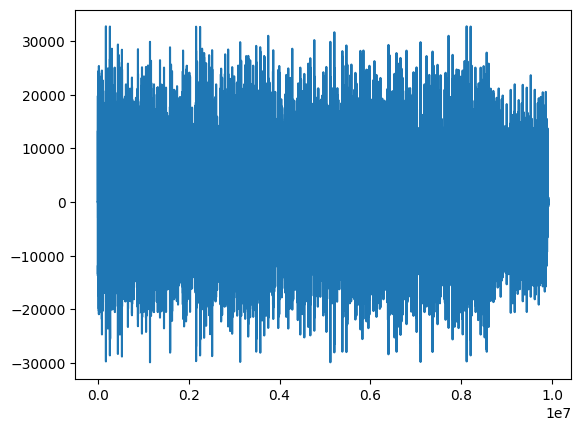

In [336]:
final_audio = final_audio / np.max(np.abs(final_audio))
final_audio = final_audio * 32767
plt.plot(final_audio)

In [337]:
wavfile.write("output/Portal_Radio_output.wav", fs, final_audio.astype(np.int16))

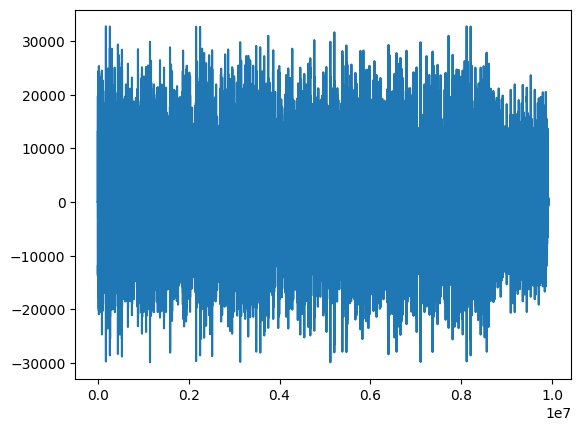

In [338]:
written_file = wavfile.read("output/Portal_Radio_output.wav")
plt.plot(written_file[1])